In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, RobustScaler

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, RobustScaler

# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score, silhouette_samples, calinski_harabasz_score
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler, RobustScaler


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('/content/creditcard 2.csv')

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


0    284315
1       492
Name: Class, dtype: int64

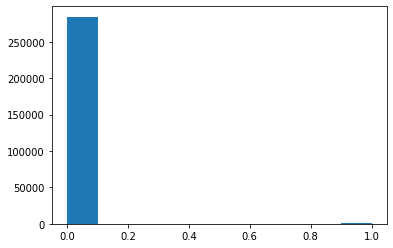

In [ ]:
#0 = No Fruad
#1 = Fraud Detected
plt.hist(df['Class'])
df['Class'].value_counts()

In [ ]:
#Removing extreme outliers
def rm_outliers(df, var):
    FQ = df[var].quantile(.25)
    TQ = df[var].quantile(.75)
    iqr = TQ-FQ
    h = 1.5*iqr
    df.loc[df[var] > TQ+h, var] = TQ+h
    df.loc[df[var] < FQ-h, var] = FQ-h

In [ ]:
rm_outliers(df,'Time')
rm_outliers(df,'V1')
rm_outliers(df,'V2')
rm_outliers(df,'V3')
rm_outliers(df,'V4')
rm_outliers(df,'V5')
rm_outliers(df,'V6')
rm_outliers(df,'V7')
rm_outliers(df,'V8')
rm_outliers(df,'V9')
rm_outliers(df,'V10')
rm_outliers(df,'V11')
rm_outliers(df,'V12')
rm_outliers(df,'V13')
rm_outliers(df,'V14')
rm_outliers(df,'V15')
rm_outliers(df,'V16')
rm_outliers(df,'V17')
rm_outliers(df,'V18')
rm_outliers(df,'V19')
rm_outliers(df,'V20')
rm_outliers(df,'V21')
rm_outliers(df,'V22')
rm_outliers(df,'V23')
rm_outliers(df,'V24')
rm_outliers(df,'V25')
rm_outliers(df,'V26')
rm_outliers(df,'V27')
rm_outliers(df,'V28')
rm_outliers(df,'Amount')

In [ ]:
#rob_scaler = RobustScaler()

#df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
#df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [ ]:
df.describe().T

In [ ]:
#Operational margin and profitability are high correlated might revisit to drop variables
plt.figure(figsize=(25, 12))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# Splitting The Data

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
rob_scaler = RobustScaler()

X_train['Amount'] = rob_scaler.fit_transform(X_train['Amount'].values.reshape(-1,1))
X_train['Time'] = rob_scaler.fit_transform(X_train['Time'].values.reshape(-1,1))

X_test['Amount'] = rob_scaler.fit_transform(X_test['Amount'].values.reshape(-1,1))
X_test['Time'] = rob_scaler.fit_transform(X_test['Time'].values.reshape(-1,1))

In [ ]:
##Data is highly imbalanced using SMOTE to fix
oversample = SMOTE()
X_train,y_train=oversample.fit_resample(X_train,y_train)

In [ ]:
plt.hist(y_train)
y_train.value_counts()

## Baseline Model

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(solver='saga')
log.fit(X_train,y_train)

In [ ]:
scores = cross_val_score(log, X_train, y_train, 
                         scoring='f1_macro', cv=10, n_jobs=-1)

In [ ]:
print(np.mean(scores))

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
y_predh=log.predict(X_test)
print(classification_report(y_test, y_predh))
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score, precision_score, recall_score
print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))

In [ ]:
confusion_matrix(y_test,y_predh)

In [ ]:
#LightGBM
import lightgbm as lgb
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train)

In [ ]:
scores = cross_val_score(clf, X_train, y_train, 
                         scoring='f1_macro', cv=10, n_jobs=-1)

In [ ]:
print(np.mean(scores))

In [ ]:
y_predh=clf.predict(X_test)
print(classification_report(y_test, y_predh))
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score, precision_score, recall_score
print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))

In [ ]:
confusion_matrix(y_test,y_predh)

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

rf= RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

In [ ]:
scores = cross_val_score(rf, X_train, y_train, 
                         scoring='f1_macro', cv=10, n_jobs=-1)

In [ ]:
print(np.mean(scores))

In [ ]:
y_predh=rf.predict(X_test)
print(classification_report(y_test, y_predh))
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score, precision_score, recall_score
print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test,y_predh)

In [ ]:
#define metrics
from sklearn import metrics
y_pred_proba = rf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest()
iso.fit(X_train,y_train)

In [ ]:
scores = cross_val_score(rf, X_train, y_train, 
                         scoring='f1_macro', cv=10, n_jobs=-1)
print(np.mean(scores))

In [ ]:
y_predh=iso.predict(X_test)

In [ ]:
print("Precision Score : ",precision_score(y_test, y_predh, 
                                           pos_label='positive',
                                           average ='macro'))

In [ ]:
y_predh=iso.predict(X_test)
print(classification_report(y_test, y_predh))
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score, precision_score, recall_score
print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))

In [ ]:
from xgboost.sklearn import XGBClassifier
from xgboost import XGBRegressor

xgb = XGBClassifier()

xgb.fit(X_train,y_train)

In [ ]:
scores = cross_val_score(xgb, X_train, y_train, 
                         scoring='f1_macro', cv=10, n_jobs=-1)
print(np.mean(scores))

In [ ]:
y_predh=xgb.predict(X_test)
print(classification_report(y_test, y_predh))
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score, precision_score, recall_score
print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))

In [ ]:
pip install CatBoost

In [ ]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier()
cat.fit(X_train,y_train)

In [ ]:
scores = cross_val_score(cat, X_train, y_train, 
                         scoring='f1_macro', cv=10, n_jobs=-1)
print(np.mean(scores))

In [ ]:
y_predh=cat.predict(X_test)
print(classification_report(y_test, y_predh))
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score, precision_score, recall_score
print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

rf_new = RandomForestClassifier(random_state=42)
rf_new.fit(X_train, y_train)

params = {
    
    'max_depth': [35],
    'n_estimators': [100],
    'max_features': ['auto'], 
    'min_samples_leaf': [6],
    'min_samples_split': [2]
    }

cv_rf = GridSearchCV(rf_new, params, scoring='f1_macro', cv = 5, n_jobs = -1, verbose = 2)

rf_new = cv_rf.fit(X_train, y_train)

In [ ]:
scores = cross_val_score(rf_new, X_train, y_train, 
                         scoring='f1_macro', cv=5, n_jobs=-1)
print(np.mean(scores))

In [ ]:
y_predh=rf_new.predict(X_test)
print(classification_report(y_test, y_predh))
from sklearn.metrics import accuracy_score,cohen_kappa_score,f1_score,log_loss,roc_auc_score, precision_score, recall_score
print("Precision = {:.2f}".format(precision_score(y_test, y_predh)))
print("Recall = {:.2f}".format(recall_score(y_test, y_predh)))
print("F1 Score Macro = {:.2f}".format(f1_score(y_test, y_predh, average = 'macro')))
print("AUC = {:.2f}".format(roc_auc_score(y_test, y_predh)))